[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SerialNo         668 non-null    int64 
 1   Session_Summary  668 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.6+ KB
None
0 null values
1 duplicates
        char_count   word_count
count   668.000000   668.000000
mean   1304.393713   210.477545
std     882.915206   146.189925
min      27.000000     1.000000
25%     725.750000   113.000000
50%    1102.500000   174.500000
75%    1611.750000   268.000000
max    9181.000000  1384.000000


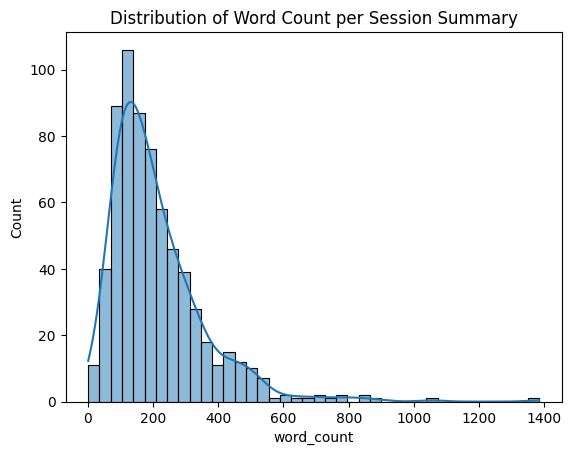

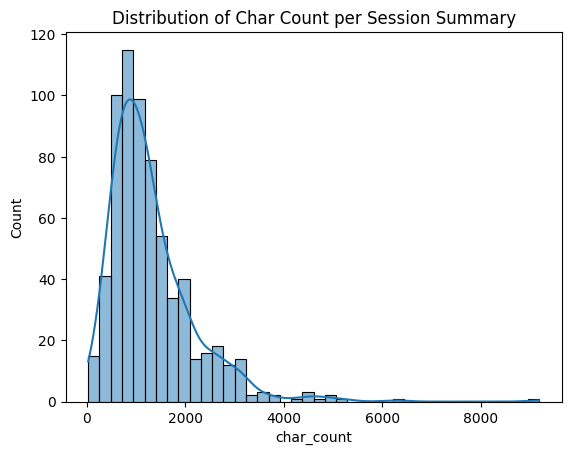

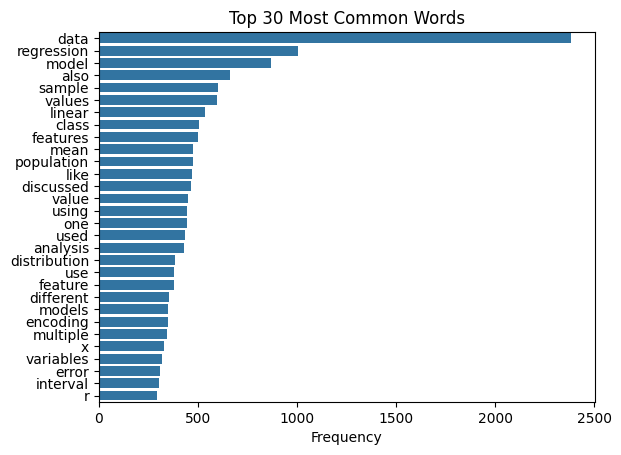

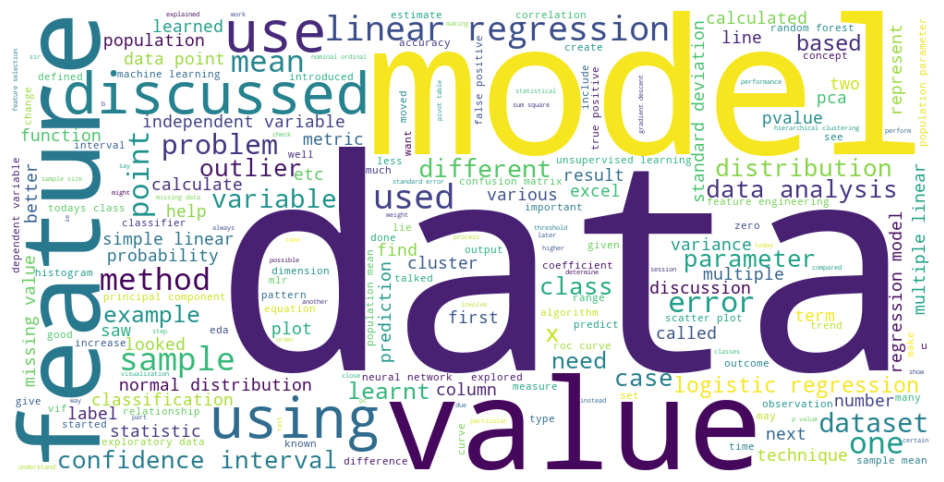

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load Excel file
df = pd.read_excel(r"D:\IITB\Studies\6th Sem\DS 203 Programming for Data Science\Project\Session-Summary-for-E6-project.xlsx")

df.head()

print(df.info())
print(df['Session_Summary'].isnull().sum(), "null values")
print(df['Session_Summary'].duplicated().sum(), "duplicates")

df['char_count'] = df['Session_Summary'].astype(str).apply(len)
df['word_count'] = df['Session_Summary'].astype(str).apply(lambda x: len(x.split()))

# Summary stats
print(df[['char_count', 'word_count']].describe())

# Plot
sns.histplot(df['word_count'], bins=40, kde=True)
plt.title("Distribution of Word Count per Session Summary")
plt.show()


# Plot
sns.histplot(df['char_count'], bins=40, kde=True)
plt.title("Distribution of Char Count per Session Summary")
plt.show()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['Session_Summary'].astype(str).apply(clean_text)

stop_words = set(stopwords.words('english'))
all_words = ' '.join(df['cleaned_text']).split()
filtered_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(filtered_words)
top_words = word_freq.most_common(30)

# Plot top words
words, counts = zip(*top_words)
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 30 Most Common Words")
plt.xlabel("Frequency")
plt.show()

wc = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


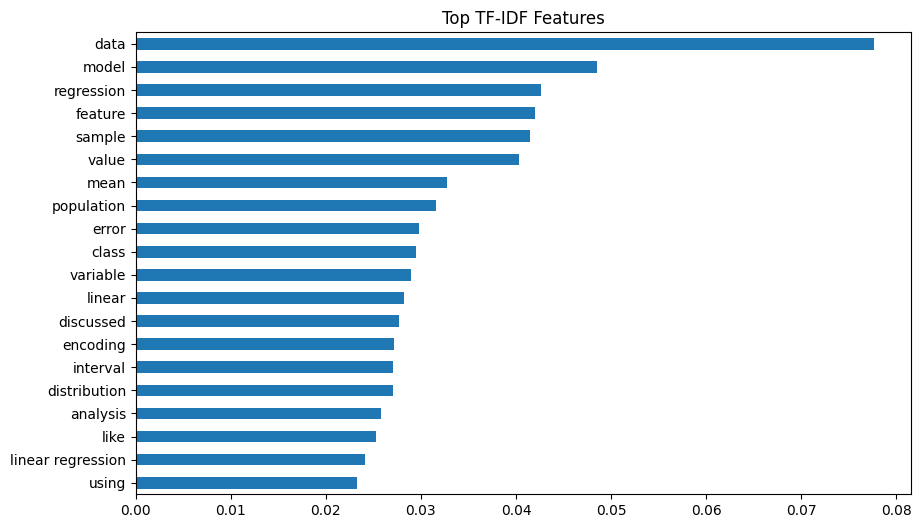

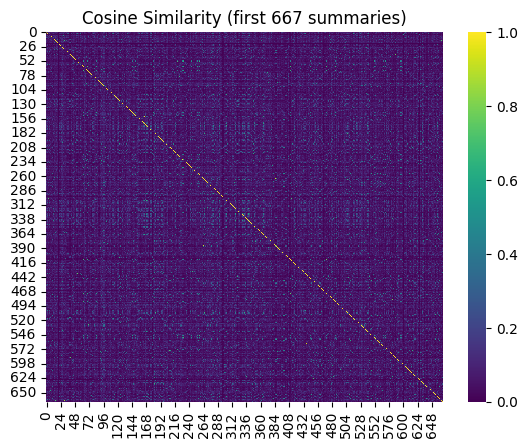


Cluster 0 top words:
[('discussion', 8), ('midsem', 5), ('data', 5), ('variable', 5), ('parametric', 4), ('exercise', 3), ('lecture', 3), ('topic', 3), ('started', 3), ('increased', 3)]

Cluster 1 top words:
[('model', 521), ('feature', 366), ('data', 362), ('regression', 290), ('value', 236), ('linear', 203), ('variable', 180), ('multiple', 173), ('one', 169), ('also', 164)]

Cluster 2 top words:
[('class', 94), ('probability', 67), ('logistic', 61), ('regression', 59), ('function', 58), ('positive', 54), ('accuracy', 53), ('precision', 52), ('model', 51), ('negative', 49)]

Cluster 3 top words:
[('data', 187), ('learning', 141), ('regression', 123), ('nominal', 108), ('ratio', 102), ('interval', 101), ('ordinal', 96), ('label', 93), ('level', 91), ('measurement', 88)]

Cluster 4 top words:
[('regression', 150), ('error', 143), ('data', 142), ('model', 107), ('distribution', 97), ('r', 95), ('coefficient', 79), ('linear', 77), ('square', 67), ('mean', 65)]

Cluster 5 top words:
[('da

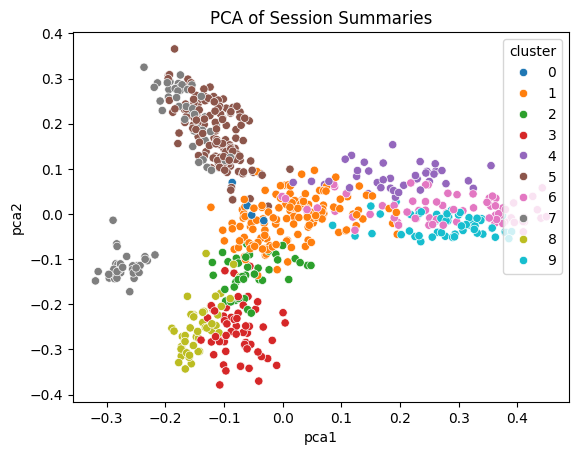


LDA Topics:
Topic 1:  ['using', 'sigmoid', 'likelihood', 'outcome', 'model', 'regression', 'probability', 'function', 'logistic', 'weight']
Topic 2:  ['using', 'insight', 'exploratory', 'eda', 'plot', 'pivot', 'table', 'summary', 'analysis', 'data']
Topic 3:  ['dependent', 'dataset', 'categorization', 'higher', 'variable', 'multiple', 'using', 'better', 'model', 'fvalue']
Topic 4:  ['measurement', 'interval', 'ordinal', 'label', 'level', 'ratio', 'nominal', 'regression', 'learning', 'data']
Topic 5:  ['value', 'beta', 'learnt', 'submission', 'started', 'saw', 'follow', 'feature', 'class', 'discussed']
Topic 6:  ['independent', 'statistically', 'similar', 'like', 'mlr', 'class', 'variable', 'data', 'feature', 'value']
Topic 7:  ['moved', 'learnt', 'help', 'shown', 'analysis', 'later', 'taken', 'outlier', 'column', 'data']
Topic 8:  ['categorical', 'target', 'problem', 'class', 'category', 'value', 'variable', 'data', 'feature', 'encoding']
Topic 9:  ['line', 'variable', 'confidence', '

In [3]:
# Text EDA Pipeline for Session Summaries Classification

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# -------------------------------
# Load & Initial Preprocessing
# -------------------------------
df = pd.read_excel("D:/IITB/Studies/6th Sem/DS 203 Programming for Data Science/Project/Session-Summary-for-E6-project.xlsx")

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['Session_Summary'].apply(clean_text)

# -------------------------------
# Text Length Features
# -------------------------------
df['char_count'] = df['Session_Summary'].str.len()
df['word_count'] = df['Session_Summary'].apply(lambda x: len(str(x).split()))
df['avg_word_length'] = df['char_count'] / df['word_count']

# -------------------------------
# TF-IDF and N-gram Analysis
# -------------------------------
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

tfidf_scores = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_mean = tfidf_scores.mean().sort_values(ascending=False)
tfidf_mean.head(20).plot(kind='barh', figsize=(10,6), title='Top TF-IDF Features')
plt.gca().invert_yaxis()
plt.show()

# -------------------------------
# Cosine Similarity Heatmap
# -------------------------------
sim_matrix = cosine_similarity(X_tfidf[:667])
sns.heatmap(sim_matrix, cmap='viridis')
plt.title("Cosine Similarity (first 667 summaries)")
plt.show()

# -------------------------------
# KMeans Clustering
# -------------------------------
kmeans = KMeans(n_clusters= 10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# View top words per cluster
for i in range(10):
    print(f"\nCluster {i} top words:")
    cluster_words = ' '.join(df[df['cluster'] == i]['cleaned_text']).split()
    print(Counter(cluster_words).most_common(10))

# -------------------------------
# PCA for 2D Visualization
# -------------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_tfidf.toarray())
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("PCA of Session Summaries")
plt.show()

# -------------------------------
# Topic Modeling with LDA
# -------------------------------
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(X_count)

print("\nLDA Topics:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: ", [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
